<a href="https://colab.research.google.com/github/NikolasGialitsis/ML_APPLIED/blob/master/GaussianMixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [396]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets.samples_generator import(make_blobs, make_circles, make_moons)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score, pairwise_distances_argmin


#Gaussian Mixtures
 1. GMMs are a family of generative parametric unsupervised models that attempt to cluster data using Gaussian distributions. 
 2. Like K-Mean, you still need to define the number of clusters K you want to learn. 
 3. Different from K-Means, GMMs represent clusters as probability distributions. This allows for one data points to belong to more than one cluster with a level of uncertainty.
 4. K-Means can only learn clusters with a circular form. GMMs, on the other hand, can learn clusters with any elliptical shape.

use old faithful dataset of geyser eruptions

In [397]:
!git clone https://github.com/NikolasGialitsis/ML_Datasets
df = pd.read_csv("/content/ML_Datasets/datasets_24551_31284_faithful.csv")

fatal: destination path 'ML_Datasets' already exists and is not an empty directory.


two clumps of data

Text(0.5, 1.0, "Ol' Faithful Geyser Eruption")

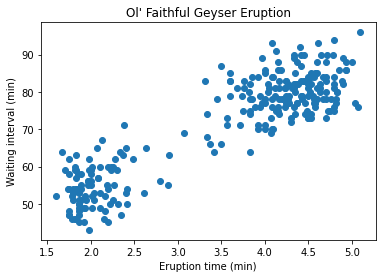

In [398]:
plt.scatter(df.eruptions, df.waiting)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting interval (min)')
plt.title('Ol\' Faithful Geyser Eruption')


##One gaussian density function fails to detect the two clusters

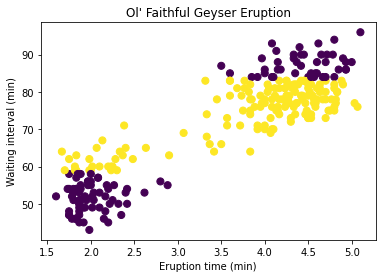

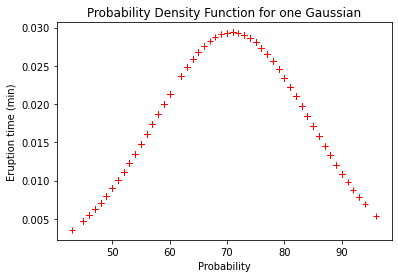

In [399]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

plt.figure(1)
x = df.eruptions
mean,std=norm.fit(df.waiting)
y = norm.pdf(df.waiting, mean, std)
#plt.plot(df.waiting, y,'r+')
#plt.scatter(df.eruptions,df.waiting
color = []
for item in y:
  if item < y.mean():
    color.append(1)
  else:
    color.append(2)
plt.scatter(df.eruptions, df.waiting, s=50, c=color)
#plt.scatter(df.waiting,y)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting interval (min)')
plt.title('Ol\' Faithful Geyser Eruption')
plt.show()
plt.figure(2)
plt.xlabel('Probability')
plt.ylabel('Eruption time (min)')
plt.title('Probability Density Function for one Gaussian')

plt.plot(df.waiting,y,'r+')
plt.show()

## Define K=2 Gaussians to model data
Use 10 iterations of EM algorithm with random initializations 


[83 43] [0.919317   0.99760757]


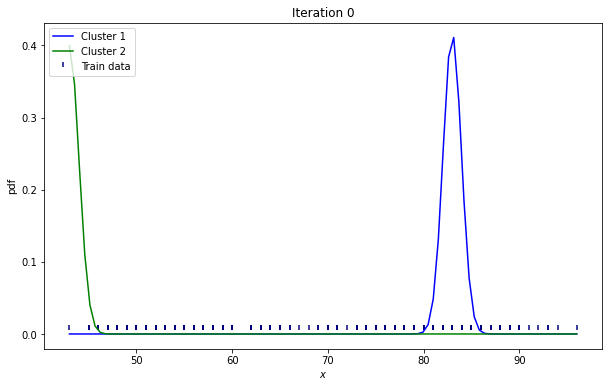

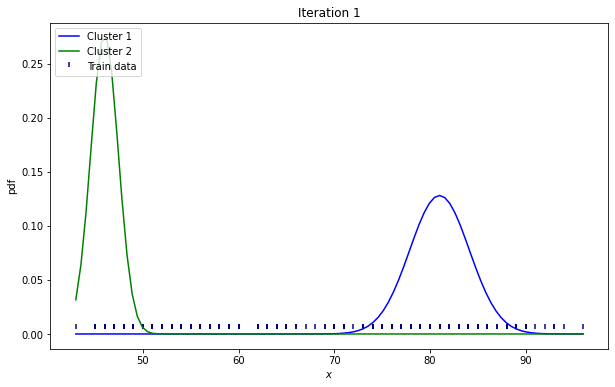

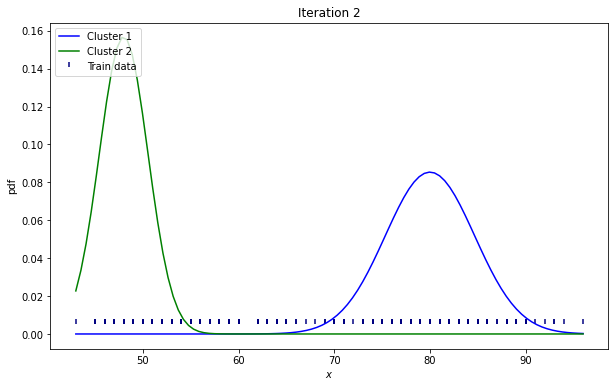

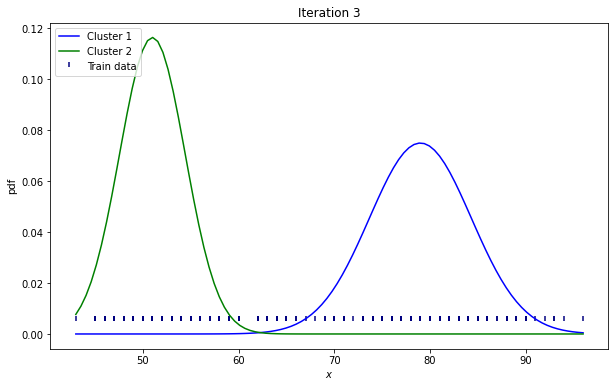

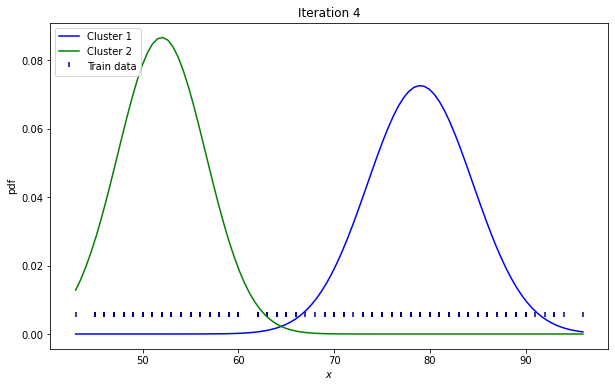

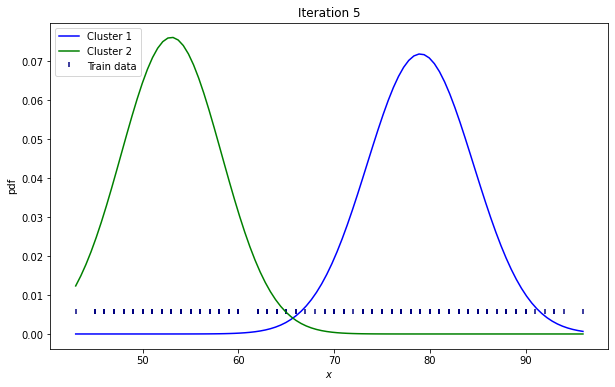

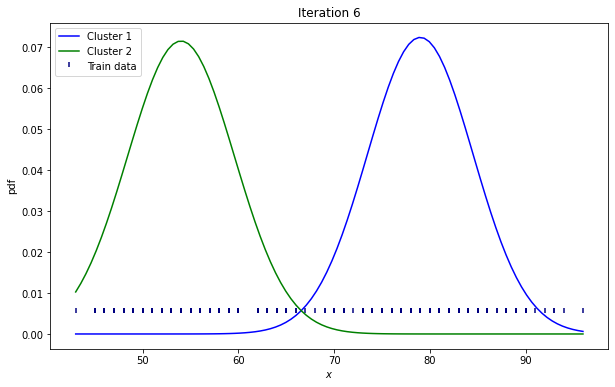

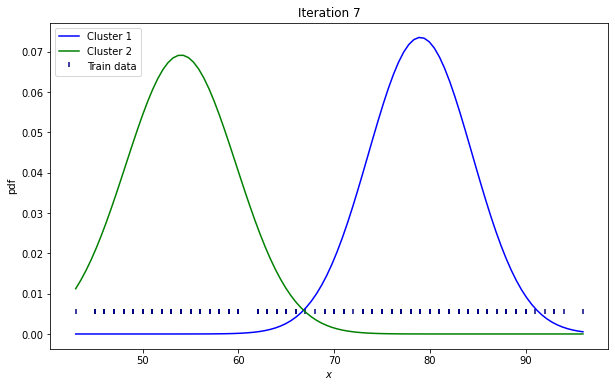

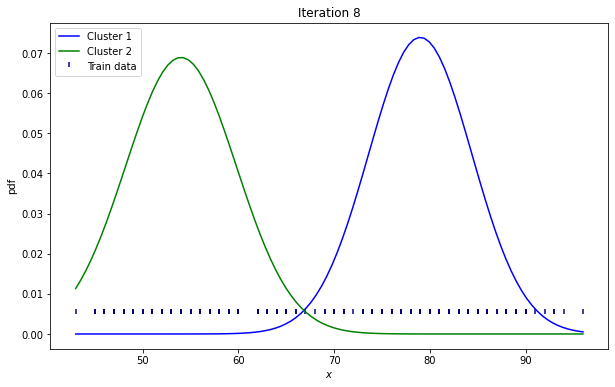

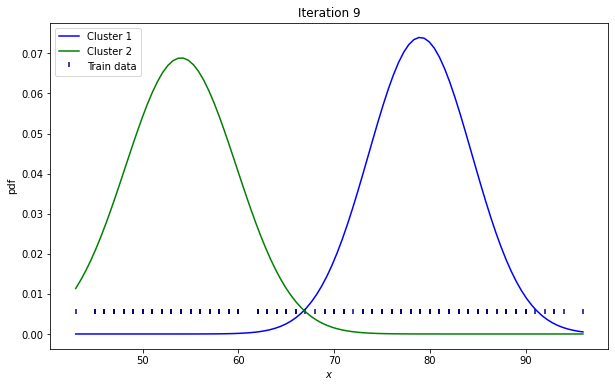

In [402]:

# define the number of clusters to be learned
k = 2
X = df.waiting.copy()
bins = np.linspace(np.min(X),np.max(X),100)
weights = [0.7,0.3] # a priori
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)


def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  s1 = 1/(np.sqrt(2*np.pi*variance))
  s2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return s1 * s2


eps=1e-8
for step in range(10):

  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")
    plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")

    plt.legend(loc='upper left')
    
    plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelihood = []
  
  # Expectation step
  for j in range(k):
    likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelihood = np.array(likelihood)
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))
  
    # updage mean and variance
    means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    
    # update the weights
    weights[j] = np.mean(b[j])






The two clusters are now identified

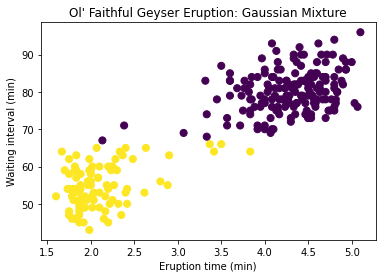

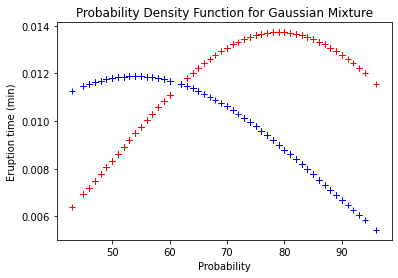

In [413]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
def gaussian_mixture(data,means,variances,pi_coeff):
  n_gaussians = len(means)
  y = 0
  for g in range(n_gaussians):
    y += norm.pdf(data, means[g], variances[g])
  return y


y = gaussian_mixture(df.waiting,means,variances,np.array(weights))

plt.figure(1)
x = df.eruptions
color = []
for item in df.waiting: #assign to cluster with min eucl. dist
  d1 = np.linalg.norm(item-means[0])
  d2 = np.linalg.norm(item-means[1])
  if d1 < d2:
    color.append(1)
  else:
    color.append(2)

plt.scatter(df.eruptions, df.waiting, s=50, c=color)
#plt.scatter(df.waiting,y)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting interval (min)')
plt.title('Ol\' Faithful Geyser Eruption: Gaussian Mixture')
plt.show()
plt.figure(2)
plt.xlabel('Probability')
plt.ylabel('Eruption time (min)')
plt.title('Probability Density Function for Gaussian Mixture')
plt.plot(df.waiting,norm.pdf(df.waiting, means[0], variances[0]),'r+')
plt.plot(df.waiting,norm.pdf(df.waiting, means[1], variances[1]),'b+')
plt.show()